In [1]:
from pathlib import Path
dataset_folder = Path.home()/'trainset_astera_5hops_nocomp'

funcs_csv = Path('/home/cls0027/exp_builds/astera.exp/rundata/run1/6.fighter/functions.csv')
locals_csv = Path('/home/cls0027/exp_builds/astera.exp/rundata/run1/6.fighter/locals.csv')
params_csv = Path('/home/cls0027/exp_builds/astera.exp/rundata/run1/6.fighter/function_params.csv')

import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

funcs_df = pd.read_csv(funcs_csv)
locals_df = pd.read_csv(locals_csv)
params_df = pd.read_csv(params_csv)
raw_stripped_locals = pd.read_csv(Path.home()/'exp_builds/astera.exp/rundata/run1/6.fighter/_raw_stripped_locals.csv')
raw_dwarf_locals = pd.read_csv(Path.home()/'exp_builds/astera.exp/rundata/run1/6.fighter/_raw_dwarf_locals.csv')

In [2]:
pd.set_option('display.max_colwidth', 15)   # JSON columns make things look weird in notebook without this

# raw_stripped_locals[raw_stripped_locals.Name=='stateMap']
funcs_df[funcs_df.FunctionStart==1613124]
tjson = locals_df[locals_df.TypeSeq_Debug.apply(lambda x: 'ARR,ARR' in x)].iloc[1].TypeJson_Debug
locals_df[locals_df.TypeSeq_Debug=='FUNC']
params_df[params_df.TypeSeq_Debug.apply(lambda x: 'FUNC' in x)].groupby('TypeSeq_Debug').count()

,FunctionStart,Signature,Name_Strip,IsReturnType_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,...,TypeJson_Debug,LeafCategory,LeafSigned,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId
TypeSeq_Debug,,,,,,,,,,,,,,,,,,,,,
"PTR,FUNC",26,26,0,26,26,0,0,0,26,26,...,26,26,26,26,26,26,26,26,26,26


In [3]:
!ls /home/cls0027/exp_builds/astera.exp/rundata/run1/6.fighter/

6.fighter	     fighter.debug	    locals.csv
6.fighter.debug      fighter.dwarf.sdb	    _raw_debug_locals.csv
6.fighter.debug.sdb  function_params.csv    _raw_dwarf_locals.csv
6.fighter.sdb	     functions.csv	    _raw_stripped_locals.csv
ast_dumps	     ghidra_ast.debug.json
fighter		     ghidra_ast.json


In [4]:
from varlib import datatype
print(datatype.DataType.from_json(tjson))

uchar[256][4]


In [5]:
#raw_dwarf_locals[raw_dwarf_locals.FunctionStart==1613124]
hex(1613124)

'0x189d44'

In [6]:
from dwarflib import DwarfDebugInfo

ddi = DwarfDebugInfo.fromElf(funcs_csv.parent/'fighter.debug')
fdie = ddi.find_function('stbi__bmp_load')
fdie

DIE DW_TAG_subprogram, size=35, has_children=True
    |DW_AT_name        :  AttributeValue(name='DW_AT_name', form='DW_FORM_strp', value=b'stbi__bmp_load', raw_value=58341, offset=164578)
    |DW_AT_decl_file   :  AttributeValue(name='DW_AT_decl_file', form='DW_FORM_data1', value=3, raw_value=3, offset=164582)
    |DW_AT_decl_line   :  AttributeValue(name='DW_AT_decl_line', form='DW_FORM_data2', value=5363, raw_value=5363, offset=164583)
    |DW_AT_decl_column :  AttributeValue(name='DW_AT_decl_column', form='DW_FORM_data1', value=14, raw_value=14, offset=164585)
    |DW_AT_prototyped  :  AttributeValue(name='DW_AT_prototyped', form='DW_FORM_flag_present', value=True, raw_value=b'', offset=164586)
    |DW_AT_type        :  AttributeValue(name='DW_AT_type', form='DW_FORM_ref4', value=158, raw_value=158, offset=164586)
    |DW_AT_low_pc      :  AttributeValue(name='DW_AT_low_pc', form='DW_FORM_addr', value=328120, raw_value=328120, offset=164590)
    |DW_AT_high_pc     :  AttributeValue(

In [7]:
vardie = [x for x in ddi.extract_variables_from_die_tree(fdie) if x.name=='pal'][0]
vardie

DIE DW_TAG_variable, size=17, has_children=False
    |DW_AT_name        :  AttributeValue(name='DW_AT_name', form='DW_FORM_string', value=b'pal', raw_value=b'pal', offset=164806)
    |DW_AT_decl_file   :  AttributeValue(name='DW_AT_decl_file', form='DW_FORM_data1', value=3, raw_value=3, offset=164810)
    |DW_AT_decl_line   :  AttributeValue(name='DW_AT_decl_line', form='DW_FORM_data2', value=5367, raw_value=5367, offset=164811)
    |DW_AT_decl_column :  AttributeValue(name='DW_AT_decl_column', form='DW_FORM_data1', value=12, raw_value=12, offset=164813)
    |DW_AT_type        :  AttributeValue(name='DW_AT_type', form='DW_FORM_ref4', value=53058, raw_value=53058, offset=164814)
    |DW_AT_location    :  AttributeValue(name='DW_AT_location', form='DW_FORM_exprloc', value=[145, 208, 119], raw_value=[145, 208, 119], offset=164818)

In [8]:
print(vardie.dtype_varlib)

uchar[256][4]


In [9]:
from varlib.datatype import ArrayType, BuiltinType

OUTSIDE_DIM = 1
INSIDE_DIM = 2
inside_type = ArrayType(BuiltinType('int',False,True,4), INSIDE_DIM)
print(ArrayType(inside_type, OUTSIDE_DIM))

int32[1][2]


In [10]:
func_row = funcs_df.iloc[37]
ast_file = func_row.AstJson_Strip

import astlib
ast = astlib.read_json(ast_file)
locals_df[locals_df.FunctionStart==func_row.FunctionStart]

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,TypeJson_Debug,LeafCategory,LeafSigned,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId
452,1123595,"757,894,984...",bVar1,char,unique,NaN,101632,BUILTIN,char,bVar2,...,"{""kind"": ""B...",BUILTIN,True,False,1,LLL,L,L,L,6
453,1123595,"281,314,386...",cVar2,char,register,al,0,BUILTIN,char,uVar3,...,"{""kind"": ""B...",BUILTIN,False,False,1,LLL,L,L,L,6
454,1123595,"162,167,219...",sVar3,short,register,ax,0,BUILTIN,short,uVar4,...,"{""kind"": ""B...",BUILTIN,False,False,2,LLL,L,L,L,6
455,1123595,"692,705,733...",uVar4,uint32,register,xmm0_da,4608,BUILTIN,uint32,fVar5,...,"{""kind"": ""B...",BUILTIN,True,True,4,LLL,L,L,L,6
456,1123595,"43,48,67,72...",dVar5,double,register,xmm0_qa,4608,BUILTIN,double,dVar6,...,"{""kind"": ""B...",BUILTIN,True,True,8,LLL,L,L,L,6
457,1123595,"705,779,823...",local_6c,float,stack,NaN,-108,BUILTIN,float,joy_vert,...,"{""kind"": ""B...",BUILTIN,True,True,4,LLL,L,L,L,6
458,1123595,"1450,1949,2...",local_68,int32,stack,NaN,-104,BUILTIN,int32,vert,...,"{""kind"": ""B...",BUILTIN,True,False,4,LLL,L,L,L,6
459,1123595,"1457,2323,2...",local_64,int32,stack,NaN,-100,BUILTIN,int32,hori,...,"{""kind"": ""B...",BUILTIN,True,False,4,LLL,L,L,L,6
460,1123595,"1468,1539,1...",local_60,float,stack,NaN,-96,BUILTIN,float,joy_vert_1,...,"{""kind"": ""B...",BUILTIN,True,True,4,LLL,L,L,L,6
461,1123595,"1477,1567,2...",local_5c,float,stack,NaN,-92,BUILTIN,float,joy_hori_1,...,"{""kind"": ""B...",BUILTIN,True,True,4,LLL,L,L,L,6


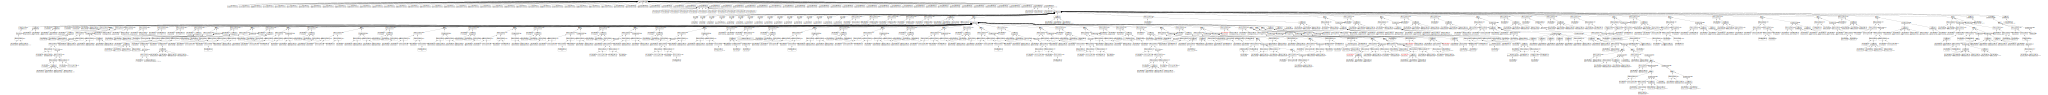

In [11]:
from astlib.color_ast import highlight_var_refs
# ast.render()
ast.render(format_node=highlight_var_refs('local_40'))

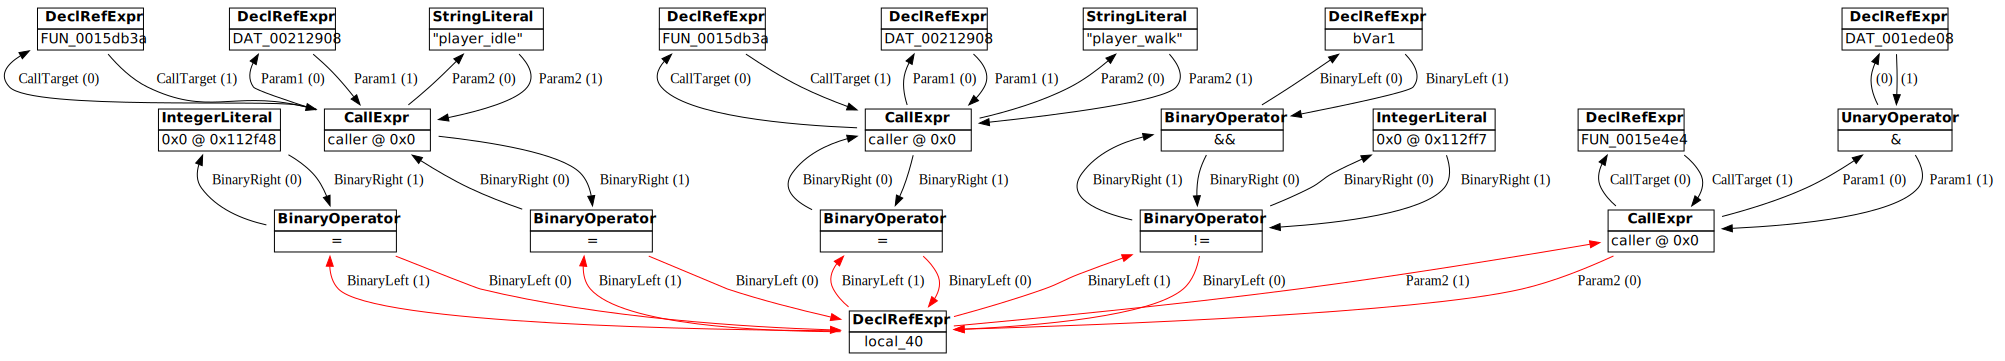

In [12]:
# ast.render()

from datatype_recovery.models.dataset import VariableGraphViewer

VariableGraphViewer('local_40', ast, max_hops=3, format_node=None, one_edge_only=False).render_vargraph()

In [7]:
pd.set_option('display.max_colwidth', 50)   # JSON columns make things look weird in notebook without this
funcs_df[funcs_df.FunctionStart==1344326]
locals_df.loc[locals_df.FunctionStart==1344326,:]

show_cols = ['Signature','Name_Strip','Type_Strip','Name_Debug','Type_Debug','TypeSeq_Debug','HasDWARF']
func_locals = locals_df.loc[locals_df.FunctionStart==1344326,show_cols]

func_locals[func_locals.TypeSeq_Debug!='COMP']
func_locals[func_locals.HasDWARF]

,Signature,Name_Strip,Type_Strip,Name_Debug,Type_Debug,TypeSeq_Debug,HasDWARF
212,"57,88,121,141,161,181,201,225,235,277",local_48,int32,slot_index,int32,int32,True
213,"72,103,431",local_44,uint32,gain,float,float,True
214,"266,347,560",local_40,uint64*,req,a_req*,"PTR,STRUCT",True
215,"303,315,325,572",local_38,uint32*,slot,int32*,"PTR,int32",True


In [8]:
hex(1344326)

'0x148346'

In [9]:
final_sigs = locals_df.loc[locals_df.FunctionStart==1344326,:].Signature
matching_sigs = raw_stripped_locals[raw_stripped_locals.FunctionStart==1344326].Signature.isin(final_sigs)
raw_stripped_locals[raw_stripped_locals.FunctionStart==1344326].loc[~matching_sigs]

,FunctionStart,Name,Signature,Type,LocType,LocRegName,LocOffset,TypeCategory,TypeSeq
211,1344326,in_FS_OFFSET,"19,584",int64,register,fs_offset,272,BUILTIN,int64
230,1344326,local_20,"19,584",int64,stack,NaN,-32,BUILTIN,int64


In [10]:
ast.compute_size()

303

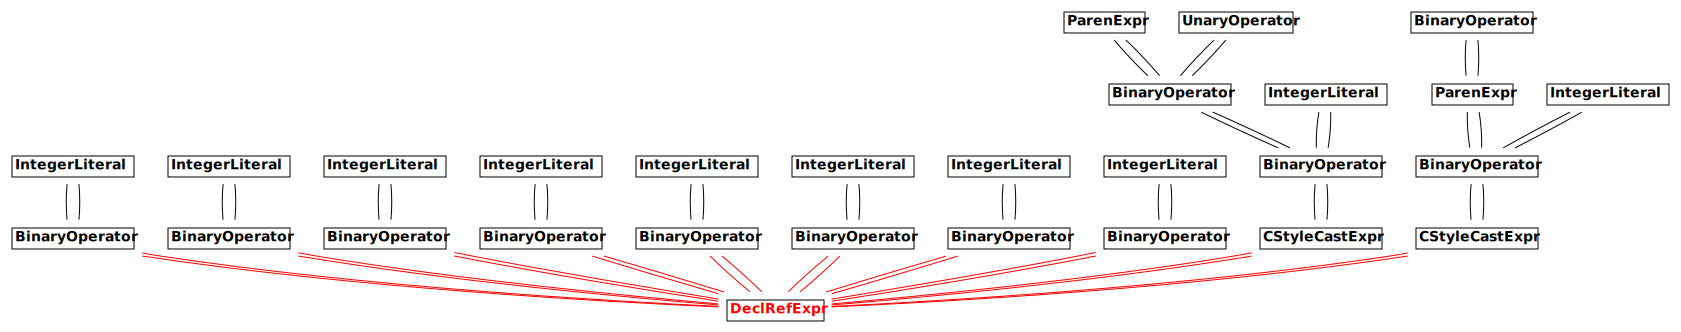

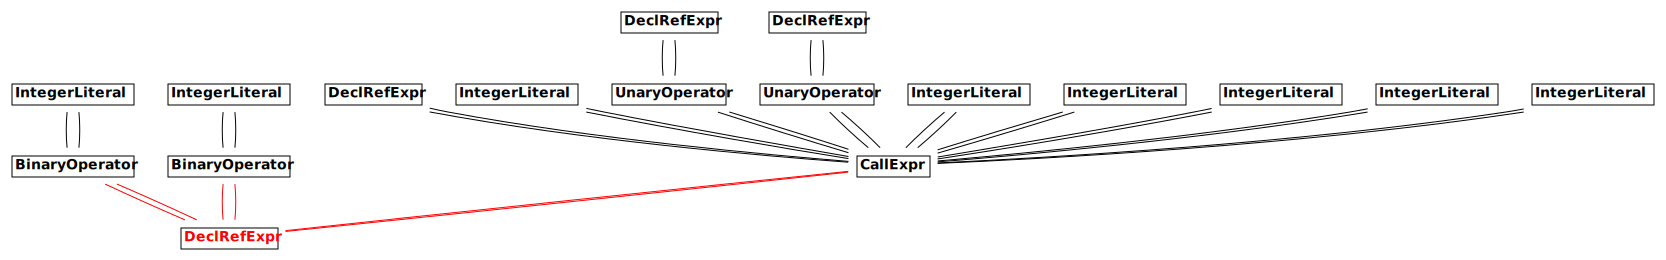

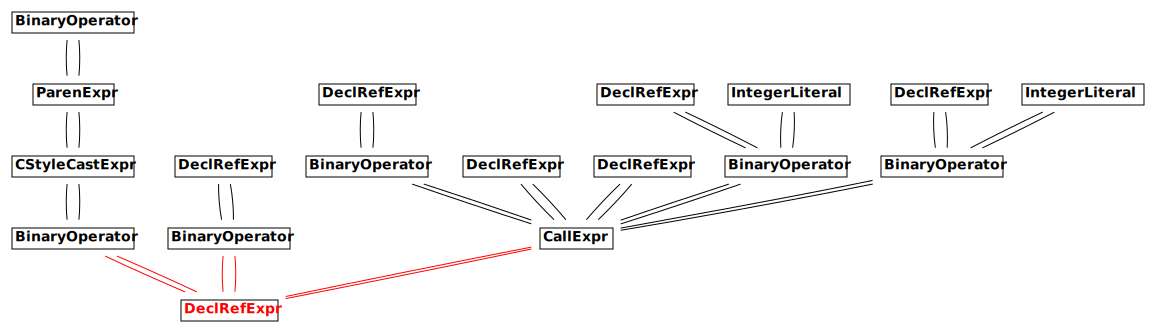

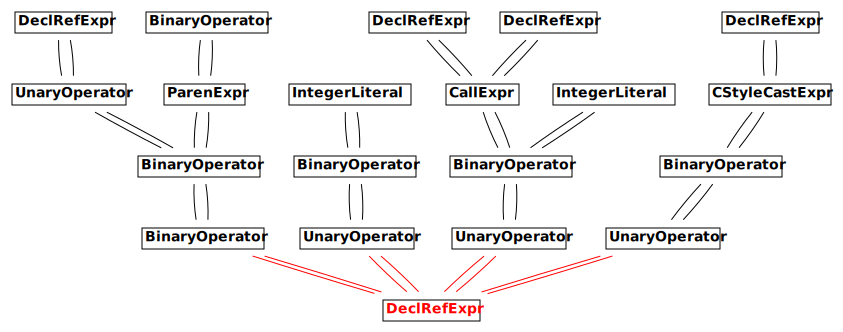

In [26]:
for vname in locals_df[(locals_df.FunctionStart==1344326)&(locals_df.HasDWARF)].Name_Strip.to_list():
    ast.render(format_node=highlight_var_refs(vname), ast_name=f'{vname}_refs', outfolder=Path.cwd()/'ast_pdfs', format='svg')
    display(VariableGraphViewer(vname, ast, one_edge_only=False, max_hops=4,
            format_node=highlight_var_refs(vname), node_kind_only=True).render_vargraph())